<a href="https://colab.research.google.com/github/fabiocceruti/Analise_Violencia_Rio_de_Janeiro/blob/main/Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Data Science na Prática**
*by Fabio Ceruti*


# Analisando a Violência no Rio de Janeiro

![](https://res.cloudinary.com/zaply/image/upload/c_scale,dpr_auto,f_auto,q_auto,w_auto/v1/blog-images/rio-de-janeiro.jpg)

O Rio de Janeiro é considerado como um dos estados mais violentos do Brasil, representando cerca de 8% do total de crimes violentos no país e tendo uma média de 21,2 ocorrências por 100 mil habitantes em 2020, acima do estado brasileiro. Para mais informações, consulte o [Monitor de Violência](http://especiais.g1.globo.com/monitor-da-violencia/2018/mortes-violentas-no-brasil/?_ga=2.140202739.1191599439.1613936354-1442002909.1613936354).

Por isso, o instituto de segurança pública ([ISP](https://www.isp.rj.gov.br:4431/Default.asp)) foi criado em 1999 pela Lei 3.329 com intuito subsidiar as políticas públicas de segurança através da disponibilização de informações e análises. 

Diante dessas informações, o objetivo desta análise é avaliar os dados relacionados com a violência no estado do Rio de Janeiro.

## Obtenção dos Dados

O *dataset* utilizado para esta análise foi obtido a partir do site do [ISP](https://www.ispdados.rj.gov.br:4432/estatistica.html), através da base de dados **"série histórica mensal no estado desde 01/1991"**.

Segundo o site, o processo de construção dos dados divulgados é realizado da seguinte forma:

>As estatísticas divulgadas são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias da Secretaria de Estado de Polícia Civil do Rio de Janeiro (SEPOL), além de informações complementares de órgãos específicos da Secretaria de Estado de Polícia Militar do Rio de Janeiro (SEPM). Antes de serem consolidados no ISP, os RO são submetidos ao controle de qualidade realizado pela Corregedoria Geral de Polícia (CGPOL) da Secretaria de Estado de Polícia Civil. As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

Os dados estão estruturados de forma histórica (ano e mês) com valores totais para cada tipo de crime registrado. É importante ressaltar que alguns crimes passaram a ser registrados a partir de anos específicos e algumas variáveis são o produto do somatório de um conjunto de colunas, conforme detalhamento do [dicionário](https://www.ispdados.rj.gov.br:4432/Notas.html) disponibilizado pelo ISP. 

Para facilitar a compreensão a respeito do *dataset*, o dicionário das variáveis bem como a sua forma de contagem pode ser encontrada na tabela abaixo.

|Variável|Descrição|Contagem por|
|--------|---------|--------|
|ano|Ano da comunicação da ocorrência| - |
|mes|Mês da comunicação da ocorrência| - |
|fase|2 - Consolidado sem errata    3 - Consolidado com errata| - |
|hom_doloso|Homicídio doloso|vítima|
|lesao_corp_morte|Lesão corporal seguida de morte|vítima|
|latrocinio|Latrocínio (roubo seguido de morte)|vítima|
|cvli|Crimes violentos letais intencionais|vítima|
|hom_por_interv_policial|Morte por intervenção de agente do Estado|vítima|
|letalidade_violenta|Letalidade violenta|vítima|
|tentat_hom|Tentativa de homicídio|vítima|
|lesao_corp_dolosa|Lesão corporal dolosa|vítima|
|estupro|Estupro|vítima|
|hom_culposo|Homicídio culposo (trânsito)|vítima|
|lesao_corp_culposa|Lesão corporal culposa (trânsito)|vítima|
|roubo_transeunte|Roubo a transeunte|caso|
|roubo_celular|Roubo de telefone celular|caso|
|roubo_em_coletivo|Roubo em coletivo|caso|
|roubo_rua|Roubo de rua|caso|
|roubo_veiculo|Roubo de veículo|caso|
|roubo_carga|Roubo de carga|caso|
|roubo_comercio|Roubo a estabelecimento comercial|caso|
|roubo_residencia|Roubo a residência|caso|
|roubo_banco|Roubo a banco|caso|
|roubo_cx_eletronico|Roubo de caixa eletrônico|caso|
|roubo_conducao_saque|Roubo com condução da vítima para saque em instituição financeira|caso|
|roubo_apos_saque|Roubo após saque em instituição financeira|caso|
|roubo_bicicleta|Roubo de bicicleta|caso|
|outros_roubos|Outros roubos que não os listados acima|caso|
|total_roubos|Total de roubos|caso|
|furto_veiculos|Furto de veículo|caso|
|furto_transeunte|Furto a transeunte|caso|
|furto_coletivo|Furto em coletivo|caso|
|furto_celular|Furto de telefone celular|caso|
|furto_bicicleta|Furto de bicicleta|caso|
|outros_furtos|Outros furtos que não os listados acima|caso|
|total_furtos|Total de furtos|caso|
|sequestro|Extorsão mediante sequestro (sequestro clássico)|vítima|
|extorsao|Extorsão|caso|
|sequestro_relampago|Extorsão com momentânea privação da liberdade (sequestro relâmpago)|vítima|
|estelionato|Estelionato|caso|
|apreensao_drogas|Apreensão de drogas|caso|
|posse_drogas|Número de registros que possuem algum título referente a posse de drogas|caso|
|trafico_drogas|Número de registros que possuem algum título referente a tráfico de drogas|caso|
|apreensao_drogas_sem_autor|Número de registros que possuem algum título referente a apreensão de drogas sem autor|caso|
|recuperacao_veiculos|Recuperação de veículo|caso|
|apf|Auto de Prisão em Flagrante|autor|
|aaapai|Auto de Apreensão de Adolescente por Prática de Ato Infracional|adolescente infrator|
|cmp|Cumprimento de Mandado de Prisão|autor|
|cmba|Cumprimento de Mandado de Busca e Apreensão|adolescente infrator|
|ameaca|Ameaça|vítima|
|pessoas_desaparecidas|Pessoas desaparecidas|vítima|
|encontro_cadaver|Encontro de cadáver|vítima|
|encontro_ossada|Encontro de ossada|vítima|
|pol_militares_mortos_serv|Policiais Militares mortos em serviço|vítima|
|pol_civis_mortos_serv|Policiais Civis mortos em serviço|vítima|
|registro_ocorrencias|Registro de ocorrências|caso|


### Importando os dados

Antes de inciar a análise, devemos importar as seguintes bibliotecas do python para nos ajudar no processo:

* **Pandas** - biblioteca responsável pela manipulação dos dados;
* **Matplotlib, Seaborn e Pywaffle** - biblioteca responsável pela visualização dos dados.


In [1]:
#Instalando a biblioteca pywaffle
!pip install pywaffle -q

     |████████████████████████████████| 532kB 5.5MB/s 


In [2]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from pywaffle import Waffle

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Vamos importar o *dataset* para começarmos a análise exploratória dos dados.

In [3]:
#Importação dos dados salvo no github
df = pd.read_csv("https://raw.githubusercontent.com/fabiocceruti/Analise_Violencia_Rio_de_Janeiro/main/dataset/DOMensalEstadoDesde1991.csv", sep = ";")

## Análise Inicial e tratamento dos dados

Vamos avaliar como estão estruturados os dados do *dataset*. O objetivo desta etapa é entender como estão distribuídos os dados e encontrar possíveis anomalias que necessitem de correção.

Primeiramente vamos avaliar a dimensão da base de dados.


In [7]:
#Imprimindo a quantidade de entrada e variável
print("Quantidade de entradas: ", df.shape[0])
print("Quantidade de variáveis: ", df.shape[1])

Quantidade de entradas:  360
Quantidade de variáveis:  56


Vamos extrair os nomes das colunas do *dataset*, lembrando que o dicionário apresentado na seção **obtenção de dados** contém o significado de cada variável.

In [8]:
#Verificando os nomes das colunas
df.columns

Index(['ano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio', 'cvli',
       'hom_por_interv_policial', 'letalidade_violenta', 'tentat_hom',
       'lesao_corp_dolosa', 'estupro', 'hom_culposo', 'lesao_corp_culposa',
       'roubo_transeunte', 'roubo_celular', 'roubo_em_coletivo', 'roubo_rua',
       'roubo_veiculo', 'roubo_carga', 'roubo_comercio', 'roubo_residencia',
       'roubo_banco', 'roubo_cx_eletronico', 'roubo_conducao_saque',
       'roubo_apos_saque', 'roubo_bicicleta', 'outros_roubos', 'total_roubos',
       'furto_veiculos', 'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_

Nosso próximo passo será de identificar o tipo de cada variável. Este passo é importante para verificar a necessidade de realizar algum tipo de conversão nos dados.

In [9]:
#Verificando os tipos das variáveis
df.dtypes

ano                            int64
mes                            int64
hom_doloso                     int64
lesao_corp_morte              object
latrocinio                     int64
cvli                          object
hom_por_interv_policial       object
letalidade_violenta            int64
tentat_hom                     int64
lesao_corp_dolosa              int64
estupro                       object
hom_culposo                   object
lesao_corp_culposa            object
roubo_transeunte               int64
roubo_celular                 object
roubo_em_coletivo              int64
roubo_rua                      int64
roubo_veiculo                  int64
roubo_carga                    int64
roubo_comercio                 int64
roubo_residencia               int64
roubo_banco                    int64
roubo_cx_eletronico           object
roubo_conducao_saque          object
roubo_apos_saque              object
roubo_bicicleta               object
outros_roubos                  int64
t

De acordo com a última etapa, podemos observar que existem variáveis de dois tipos de dados:
* **Int64** - número inteiro;
* **Object** - texto.

O fato interessante é que as variáveis que são numéricas vieram como texto e precisaremos investigar mais a fundo a respeito desta anomalia.

Então, o próximo passo é avaliarmos as 5 primeiras linhas e as 5 últimas linhas.

In [10]:
#Avaliando as 5 primeiras linhas
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1991,1,657,,15,,,672,162,3051,,,,967,,381,1348,1174,63,350,188,37,,,,,158,3318,2009,1147,,,,3561,6717,,,,,133,,,,872,,,,,,,217,,,,,3
1,1991,2,732,,17,,,749,175,3421,,,,963,,432,1395,1097,64,357,171,35,,,,,142,3261,1850,1066,,,,3309,6225,,,,,127,,,,751,,,,,,,209,,,,,3
2,1991,3,713,,25,,,738,216,3613,,,,963,,422,1385,1265,71,443,191,43,,,,,131,3529,2084,1062,,,,3573,6719,,,,,80,,,,789,,,,,,,188,,,,,3
3,1991,4,634,,20,,,654,200,3211,,,,1186,,354,1540,1415,81,425,199,36,,,,,112,3808,2085,1195,,,,3290,6570,,,,,133,,,,787,,,,,,,140,,,,,3
4,1991,5,650,,20,,,670,146,3051,,,,931,,335,1266,1449,82,553,231,27,,,,,147,3755,2185,723,,,,3546,6454,,,,,163,,,,845,,,,,,,78,,,,,3


In [11]:
#Avaliando as 5 últimas linhas
df.tail()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
355,2020,8,261,2,12,275,51,326,354,4213,459,162,1702,3481,1252,659,5392,1791,415,243,42,2,5,4,74,15,1190,9173,1107,702,343,746,129,5755,8782,0,118,3,4592,2050,1009,917,172,1283,2915,343,1512,35,4102,275,29,4,0,2,50348,3
356,2020,9,239,3,7,249,54,303,343,4560,481,171,1675,3567,1319,582,5468,1742,323,294,61,0,4,2,57,27,1146,9124,1065,698,379,823,132,5888,8985,1,105,5,4086,1984,974,890,150,1173,2497,455,1059,37,4094,297,22,1,0,0,48732,3
357,2020,10,274,2,5,281,145,426,405,4602,452,168,1841,3971,1283,768,6022,1899,358,289,49,0,0,6,51,15,1239,9928,1058,813,431,1005,157,5864,9328,0,105,11,4593,2019,972,910,173,1212,2787,369,993,37,4194,297,24,4,2,0,50772,2
358,2020,11,324,2,8,334,80,414,400,4620,467,173,1780,3763,1301,707,5771,2083,331,273,71,1,2,7,64,12,1294,9909,1052,837,395,1017,148,5402,8851,1,107,7,3723,1738,803,820,147,1273,2629,381,642,37,4055,316,19,3,1,1,47940,2
359,2020,12,279,2,8,289,79,368,322,4672,424,186,1656,3544,1273,715,5532,2300,459,324,75,0,4,6,68,24,1368,10160,1111,807,318,1018,157,5508,8919,0,112,5,3541,1709,784,827,133,1190,2673,360,906,40,4116,308,20,0,1,1,47842,2


Podemos correlacionar que as variáveis classificadas como **object** possuem valores ausentes, conforme as 5 primeiras linhas. Por padrão, a biblioteca pandas reconheceria as entradas vazias e as classificaria como tipo float. Porém, algumas entradas foram preenchidas com **espaço**, confundindo a importação dos dados pelo pandas.

Portanto, o próximo passo é converter para valor numérico estas variáveis e imprimir novamente as 5 primeiras linhas.

In [12]:
#Criando uma variável com as colunas a serem modificadas.
Lista_Variaveis = [
                   'lesao_corp_morte',
                   'cvli',
                   'hom_por_interv_policial',
                   'estupro',
                   'hom_culposo',
                   'lesao_corp_culposa',
                   'roubo_celular',
                   'roubo_cx_eletronico',
                   'roubo_conducao_saque', 
                   'roubo_apos_saque', 
                   'roubo_bicicleta', 
                   'furto_coletivo', 
                   'furto_celular', 
                   'furto_bicicleta', 
                   'sequestro', 
                   'extorsao',
                   'sequestro_relampago',
                   'estelionato',
                   'posse_drogas',
                   'trafico_drogas',
                   'apreensao_drogas_sem_autor',
                   'apf',
                   'aaapai',
                   'cmp',
                   'cmba',
                   'ameaca',
                   'pessoas_desaparecidas',
                   'encontro_ossada',
                   'pol_militares_mortos_serv',
                   'pol_civis_mortos_serv',
                   'registro_ocorrencias'
                   ]

#Criando um loop para converter cada variável em tipo numérico
for variavel in Lista_Variaveis:

  #Aplicando a função do pandas para converter em valor numérico
  #Errors = Coerce -> Transforma qualquer string (espaço) em NaN
  df[variavel] = pd.to_numeric(df[variavel],errors='coerce')

In [13]:
#Imprimindo as 5 primeira slinhas do dataframe
df.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,NaN,672,162,3051,NaN,NaN,NaN,967,NaN,381,1348,1174,63,350,188,37,NaN,NaN,NaN,NaN,158,3318,2009,1147,NaN,NaN,NaN,3561,6717,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,872,NaN,NaN,NaN,NaN,NaN,NaN,217,NaN,NaN,NaN,NaN,3
1,1991,2,732,NaN,17,NaN,NaN,749,175,3421,NaN,NaN,NaN,963,NaN,432,1395,1097,64,357,171,35,NaN,NaN,NaN,NaN,142,3261,1850,1066,NaN,NaN,NaN,3309,6225,NaN,NaN,NaN,NaN,127,NaN,NaN,NaN,751,NaN,NaN,NaN,NaN,NaN,NaN,209,NaN,NaN,NaN,NaN,3
2,1991,3,713,NaN,25,NaN,NaN,738,216,3613,NaN,NaN,NaN,963,NaN,422,1385,1265,71,443,191,43,NaN,NaN,NaN,NaN,131,3529,2084,1062,NaN,NaN,NaN,3573,6719,NaN,NaN,NaN,NaN,80,NaN,NaN,NaN,789,NaN,NaN,NaN,NaN,NaN,NaN,188,NaN,NaN,NaN,NaN,3
3,1991,4,634,NaN,20,NaN,NaN,654,200,3211,NaN,NaN,NaN,1186,NaN,354,1540,1415,81,425,199,36,NaN,NaN,NaN,NaN,112,3808,2085,1195,NaN,NaN,NaN,3290,6570,NaN,NaN,NaN,NaN,133,NaN,NaN,NaN,787,NaN,NaN,NaN,NaN,NaN,NaN,140,NaN,NaN,NaN,NaN,3
4,1991,5,650,NaN,20,NaN,NaN,670,146,3051,NaN,NaN,NaN,931,NaN,335,1266,1449,82,553,231,27,NaN,NaN,NaN,NaN,147,3755,2185,723,NaN,NaN,NaN,3546,6454,NaN,NaN,NaN,NaN,163,NaN,NaN,NaN,845,NaN,NaN,NaN,NaN,NaN,NaN,78,NaN,NaN,NaN,NaN,3


Vamos avaliar as 5 últimas linhas para verificar se os dados estão corretos.

In [14]:
#Imprimindo as 5 últimas linhdas do dataframe
df.tail()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
355,2020,8,261,2.0,12,275.0,51.0,326,354,4213,459.0,162.0,1702.0,3481,1252.0,659,5392,1791,415,243,42,2,5.0,4.0,74.0,15.0,1190,9173,1107,702,343.0,746.0,129.0,5755,8782,0.0,118.0,3.0,4592.0,2050,1009.0,917.0,172.0,1283,2915.0,343.0,1512.0,35.0,4102.0,275.0,29,4.0,0.0,2.0,50348.0,3
356,2020,9,239,3.0,7,249.0,54.0,303,343,4560,481.0,171.0,1675.0,3567,1319.0,582,5468,1742,323,294,61,0,4.0,2.0,57.0,27.0,1146,9124,1065,698,379.0,823.0,132.0,5888,8985,1.0,105.0,5.0,4086.0,1984,974.0,890.0,150.0,1173,2497.0,455.0,1059.0,37.0,4094.0,297.0,22,1.0,0.0,0.0,48732.0,3
357,2020,10,274,2.0,5,281.0,145.0,426,405,4602,452.0,168.0,1841.0,3971,1283.0,768,6022,1899,358,289,49,0,0.0,6.0,51.0,15.0,1239,9928,1058,813,431.0,1005.0,157.0,5864,9328,0.0,105.0,11.0,4593.0,2019,972.0,910.0,173.0,1212,2787.0,369.0,993.0,37.0,4194.0,297.0,24,4.0,2.0,0.0,50772.0,2
358,2020,11,324,2.0,8,334.0,80.0,414,400,4620,467.0,173.0,1780.0,3763,1301.0,707,5771,2083,331,273,71,1,2.0,7.0,64.0,12.0,1294,9909,1052,837,395.0,1017.0,148.0,5402,8851,1.0,107.0,7.0,3723.0,1738,803.0,820.0,147.0,1273,2629.0,381.0,642.0,37.0,4055.0,316.0,19,3.0,1.0,1.0,47940.0,2
359,2020,12,279,2.0,8,289.0,79.0,368,322,4672,424.0,186.0,1656.0,3544,1273.0,715,5532,2300,459,324,75,0,4.0,6.0,68.0,24.0,1368,10160,1111,807,318.0,1018.0,157.0,5508,8919,0.0,112.0,5.0,3541.0,1709,784.0,827.0,133.0,1190,2673.0,360.0,906.0,40.0,4116.0,308.0,20,0.0,1.0,1.0,47842.0,2


Agora, depois da conversão das colunas de string para valor numérico, vamos reavaliar os tipos para cada coluna.

In [15]:
#Imprimindo os tipos por colunas
df.dtypes

ano                             int64
mes                             int64
hom_doloso                      int64
lesao_corp_morte              float64
latrocinio                      int64
cvli                          float64
hom_por_interv_policial       float64
letalidade_violenta             int64
tentat_hom                      int64
lesao_corp_dolosa               int64
estupro                       float64
hom_culposo                   float64
lesao_corp_culposa            float64
roubo_transeunte                int64
roubo_celular                 float64
roubo_em_coletivo               int64
roubo_rua                       int64
roubo_veiculo                   int64
roubo_carga                     int64
roubo_comercio                  int64
roubo_residencia                int64
roubo_banco                     int64
roubo_cx_eletronico           float64
roubo_conducao_saque          float64
roubo_apos_saque              float64
roubo_bicicleta               float64
outros_roubo

Podemos notar que não existe mais variável do tipo **object** e foram convertidas para o tipo **float** (número com casa decimal). Por padrão, o pandas considera as colunas numéricas que possuem **NaN** do tipo float.

O próximo passo é calcular o percentual de valores ausentes para cada variável.

In [16]:
#Calculando a quantidade de valores ausentes
round((((df.isnull().sum()).sort_values(ascending = False)) / df.shape[0])*100,2)

furto_bicicleta               76.67
roubo_bicicleta               76.67
posse_drogas                  50.00
cmba                          50.00
cmp                           50.00
aaapai                        50.00
apf                           50.00
apreensao_drogas_sem_autor    50.00
trafico_drogas                50.00
roubo_cx_eletronico           40.00
roubo_apos_saque              40.00
extorsao                      40.00
sequestro_relampago           40.00
estelionato                   40.00
roubo_conducao_saque          40.00
furto_celular                 40.00
furto_coletivo                40.00
estupro                       40.00
pol_militares_mortos_serv     40.00
pol_civis_mortos_serv         40.00
pessoas_desaparecidas         36.67
encontro_ossada               36.67
roubo_celular                 30.00
lesao_corp_culposa            26.67
registro_ocorrencias          26.67
sequestro                     26.67
cvli                          26.67
lesao_corp_morte            

O percentual de valores ausentes está atrelada ao ano que estas variáveis passaram a ser registradas, segundo o [dicionário](https://www.ispdados.rj.gov.br:4432/Notas.html) do ISP. 

Diante desta informação, vamos verificar a partir de qual ano cada variável começou a ser registrada, com exceção da coluna **ano** e **mes**.

In [17]:
#Criando uma variável do tipo dicionário para receber os valores dos anos
#que começaram o registro para cada variável
ano_registro = {}

#Loop para pegar os anos que começaram o preenchimento por variável
for nome_coluna in df.columns:

  #Desconsiderar a variável ano e mês
  if (nome_coluna != "ano") or (nome_coluna != "mes"):

    ano_registro[nome_coluna] = df['ano'][df.loc[df[nome_coluna].isnull() == False].index[0]]

#Imprimindo o dicionário
ano_registro

{'aaapai': 2006,
 'ameaca': 1999,
 'ano': 1991,
 'apf': 2006,
 'apreensao_drogas': 1991,
 'apreensao_drogas_sem_autor': 2006,
 'cmba': 2006,
 'cmp': 2006,
 'cvli': 1999,
 'encontro_cadaver': 1991,
 'encontro_ossada': 2002,
 'estelionato': 2003,
 'estupro': 2003,
 'extorsao': 2003,
 'fase': 1991,
 'furto_bicicleta': 2014,
 'furto_celular': 2003,
 'furto_coletivo': 2003,
 'furto_transeunte': 1991,
 'furto_veiculos': 1991,
 'hom_culposo': 1998,
 'hom_doloso': 1991,
 'hom_por_interv_policial': 1998,
 'latrocinio': 1991,
 'lesao_corp_culposa': 1999,
 'lesao_corp_dolosa': 1991,
 'lesao_corp_morte': 1999,
 'letalidade_violenta': 1991,
 'mes': 1991,
 'outros_furtos': 1991,
 'outros_roubos': 1991,
 'pessoas_desaparecidas': 2002,
 'pol_civis_mortos_serv': 2003,
 'pol_militares_mortos_serv': 2003,
 'posse_drogas': 2006,
 'recuperacao_veiculos': 1991,
 'registro_ocorrencias': 1999,
 'roubo_apos_saque': 2003,
 'roubo_banco': 1991,
 'roubo_bicicleta': 2014,
 'roubo_carga': 1991,
 'roubo_celular': 20

A partir da relação por ano, podemos avaliar a evolução dos registros de crimes. Vale destacar que as variáveis mais recentes estão associadas a furto e roubo de bicicletas.

Diante desta evolução de registro e em busca de dados com maior confiabilidade, vamos analisar os dados referentes aos ultimos 10 anos. Iremos partir da premissa que além da evolução dos registros, houve também melhoras associadas na forma de como registrar.

In [18]:
#Definindo um df com base em um ano de corte a partir de 2010
df_corte_2010 = df.drop(df.loc[ df['ano'] < 2010 ].index,axis=0)

Definido um novo dataframe com dados a partir do ano de 2010.

Para melhor avaliação, vamos verificar as 5 primeiras linhas e 5 últimas linhas.

In [19]:
#Imprimindo as 5 primeiras linhas
df_corte_2010.head()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
228,2010,1,447,6.0,19,472.0,77.0,549,377,7716,345.0,161.0,3511.0,5292,622.0,568,6482,1945,234,373,123,1,4.0,10.0,139.0,NaN,1036,10347,1683,2618,704.0,1768.0,NaN,8077,14850,2.0,89.0,5.0,1716.0,891,301.0,466.0,143.0,1497,1763.0,385.0,695.0,43.0,6868.0,481.0,69,2.0,3.0,3.0,56534.0,3
229,2010,2,473,3.0,6,482.0,62.0,544,329,7201,391.0,198.0,3267.0,5361,546.0,582,6489,1739,221,348,116,2,1.0,6.0,123.0,NaN,1003,10048,1669,4095,710.0,1985.0,NaN,7897,16356,0.0,65.0,7.0,1628.0,865,286.0,463.0,135.0,1320,1664.0,326.0,753.0,21.0,6403.0,473.0,67,1.0,1.0,0.0,56299.0,3
230,2010,3,492,4.0,17,513.0,81.0,594,391,6767,341.0,186.0,3661.0,6036,693.0,795,7524,2041,229,441,148,2,3.0,14.0,145.0,NaN,1100,11647,1713,2744,871.0,1954.0,NaN,8260,15542,2.0,169.0,12.0,2249.0,933,309.0,507.0,140.0,1584,1861.0,397.0,958.0,45.0,6618.0,447.0,57,3.0,0.0,0.0,59907.0,3
231,2010,4,432,2.0,11,445.0,102.0,547,347,6185,337.0,216.0,3209.0,5581,574.0,716,6871,1784,181,420,113,2,1.0,6.0,129.0,NaN,990,10497,1594,2263,789.0,1768.0,NaN,7381,13795,0.0,140.0,6.0,1813.0,871,274.0,477.0,133.0,1378,1803.0,395.0,727.0,31.0,6051.0,437.0,45,1.0,0.0,0.0,53658.0,3
232,2010,5,361,7.0,11,379.0,109.0,488,345,6267,345.0,208.0,3674.0,5749,650.0,691,7090,1648,215,441,132,2,3.0,8.0,147.0,NaN,963,10649,1670,2639,868.0,1941.0,NaN,8052,15170,0.0,122.0,5.0,2215.0,1038,351.0,557.0,151.0,1438,2031.0,409.0,1197.0,41.0,5892.0,403.0,44,2.0,1.0,0.0,58057.0,3


In [20]:
#Imprimindo as 5 últimas linhas
df_corte_2010.tail()

,ano,mes,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,lesao_corp_culposa,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos,sequestro,extorsao,sequestro_relampago,estelionato,apreensao_drogas,posse_drogas,trafico_drogas,apreensao_drogas_sem_autor,recuperacao_veiculos,apf,aaapai,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
355,2020,8,261,2.0,12,275.0,51.0,326,354,4213,459.0,162.0,1702.0,3481,1252.0,659,5392,1791,415,243,42,2,5.0,4.0,74.0,15.0,1190,9173,1107,702,343.0,746.0,129.0,5755,8782,0.0,118.0,3.0,4592.0,2050,1009.0,917.0,172.0,1283,2915.0,343.0,1512.0,35.0,4102.0,275.0,29,4.0,0.0,2.0,50348.0,3
356,2020,9,239,3.0,7,249.0,54.0,303,343,4560,481.0,171.0,1675.0,3567,1319.0,582,5468,1742,323,294,61,0,4.0,2.0,57.0,27.0,1146,9124,1065,698,379.0,823.0,132.0,5888,8985,1.0,105.0,5.0,4086.0,1984,974.0,890.0,150.0,1173,2497.0,455.0,1059.0,37.0,4094.0,297.0,22,1.0,0.0,0.0,48732.0,3
357,2020,10,274,2.0,5,281.0,145.0,426,405,4602,452.0,168.0,1841.0,3971,1283.0,768,6022,1899,358,289,49,0,0.0,6.0,51.0,15.0,1239,9928,1058,813,431.0,1005.0,157.0,5864,9328,0.0,105.0,11.0,4593.0,2019,972.0,910.0,173.0,1212,2787.0,369.0,993.0,37.0,4194.0,297.0,24,4.0,2.0,0.0,50772.0,2
358,2020,11,324,2.0,8,334.0,80.0,414,400,4620,467.0,173.0,1780.0,3763,1301.0,707,5771,2083,331,273,71,1,2.0,7.0,64.0,12.0,1294,9909,1052,837,395.0,1017.0,148.0,5402,8851,1.0,107.0,7.0,3723.0,1738,803.0,820.0,147.0,1273,2629.0,381.0,642.0,37.0,4055.0,316.0,19,3.0,1.0,1.0,47940.0,2
359,2020,12,279,2.0,8,289.0,79.0,368,322,4672,424.0,186.0,1656.0,3544,1273.0,715,5532,2300,459,324,75,0,4.0,6.0,68.0,24.0,1368,10160,1111,807,318.0,1018.0,157.0,5508,8919,0.0,112.0,5.0,3541.0,1709,784.0,827.0,133.0,1190,2673.0,360.0,906.0,40.0,4116.0,308.0,20,0.0,1.0,1.0,47842.0,2


Com a impressão das 5 primeiras e ultimas linhas, podemos verificar que não existem mais dados ausentes.

Vamos utilizar este nova *dataset* com ano de corte a partir de 2010 para as análises nas seções posteriores.

## Análise dos dados no Rio de Janeiro

Com os dados tratados, iremos avaliar os dados relacionados com a violência do Rio de Janeiro separando as variáveis em 7 grupos de acordo com as classificações do **ISP**:
* Crimes violentos;
* Crimes de trânsito;
* Roubos;
* Furtos;
* Outros crimes contra o patrimônio;
* Atividade policial;
* Outros registros.

Diante disso, vamos criar uma lista contendo as variáveis associadas a cada grupo.

In [21]:
#Lista Crimes violentos
crimes_violentos = ['hom_doloso', 
                    'lesao_corp_morte', 
                    'latrocinio', 
                    'cvli', 
                    'hom_por_interv_policial', 
                    'letalidade_violenta', 
                    'tentat_hom', 
                    'lesao_corp_dolosa', 
                    'estupro']

#Lista Crimes de trânsito
crimes_transito = ['hom_culposo', 
                   'lesao_corp_culposa']

#Lista Roubos
crimes_roubos = ['roubo_transeunte', 
                 'roubo_celular', 
                 'roubo_em_coletivo', 
                 'roubo_rua', 
                 'roubo_veiculo', 
                 'roubo_carga', 
                 'roubo_comercio', 
                 'roubo_residencia', 
                 'roubo_banco', 
                 'roubo_cx_eletronico', 
                 'roubo_conducao_saque', 
                 'roubo_apos_saque', 
                 'roubo_bicicleta', 
                 'outros_roubos', 
                 'total_roubos']

#Lista Furtos
crimes_furtos = ['furto_veiculos', 
                 'furto_transeunte', 
                 'furto_coletivo', 
                 'furto_celular', 
                 'furto_bicicleta', 
                 'outros_furtos', 
                 'total_furtos']

#Lista Outros crimes contra o patrimônio
crimes_outro_patrim = ['sequestro', 
                       'extorsao', 
                       'sequestro_relampago', 
                       'estelionato']

#Lista Atividade Policial
ativ_policial = ['apreensao_drogas', 
                 'posse_drogas', 
                 'trafico_drogas', 
                 'apreensao_drogas_sem_autor', 
                 'recuperacao_veiculos', 
                 'apf', 
                 'aaapai', 
                 'cmp', 
                 'cmba']

#Lista Outros registros
crimes_outros_registros = ['ameaca', 
                           'pessoas_desaparecidas', 
                           'encontro_cadaver', 
                           'encontro_ossada', 
                           'pol_militares_mortos_serv', 
                           'pol_civis_mortos_serv']

Com as listagens definidas, podemos utilizar estes agrupamentos para análises através dos resumos estatísticos de cada variável, o comportamento dos dados em relação ao tempo e entre outros.

Porém, o foco principal das análises posteriores será dados aos seguintes agrupamentos:
* Crimes violentos;
* Crimes de trânsito;
* Crimes associados a roubos;
* Crimes associados a furtos;
* Atividade policial.


### Crimes violentos

O primeiro passo é verificarmos o resumo estatístico das variáveis classificadas como crimes violentos. 

In [22]:
#Resumo estatístico dos crimes violentos
df_corte_2010[crimes_violentos].describe()

,hom_doloso,lesao_corp_morte,latrocinio,cvli,hom_por_interv_policial,letalidade_violenta,tentat_hom,lesao_corp_dolosa,estupro
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,377.969697,3.424242,12.901515,394.295455,76.371212,470.666667,442.007576,6182.409091,432.924242
std,60.392601,2.086383,5.474242,63.945437,43.360271,78.347403,85.851505,1260.107132,57.411947
min,239.000000,0.000000,2.000000,249.000000,15.000000,297.000000,272.000000,2429.000000,241.000000
25%,331.750000,2.000000,9.000000,344.000000,42.500000,414.750000,371.250000,5362.000000,395.750000
50%,374.000000,3.000000,12.000000,391.500000,62.500000,472.500000,447.500000,6267.500000,428.500000
75%,418.500000,5.000000,16.000000,435.750000,102.000000,526.000000,509.000000,7122.750000,473.250000
max,510.000000,8.000000,30.000000,534.000000,195.000000,655.000000,645.000000,9050.000000,561.000000


Antes de entrar na análise, é importante destacar que os crimes violentos letais intencionais (**cvli**) corresponde ao somatório das variáveis **hom_doloso**, **lesao_corp_morte** e **latrocinio**. Além disso, a letalidade violenta (**letalidade_violenta**) é o resultado do somatório entre a variável **cvli** e **hom_por_interv_policial**.

Conseguimos extrair algumas informações importantes como:
* 394 pessoas em média são vítimas de crimes violentos letais intencionais por mês, com maior impacto sendo causado por homicídios dolosos. Vale destacar também o desvio padrão que mostra uma certa dispersão nos dados, podendo variar por mês cerca de 64 vítimas para mais ou para menos;
* O menor número de homicídio doloso foi 239 vítimas, enquanto o maior número foi de 510;
* Em média 76 homicídios estão relacionados com a intervenção policial durante a necessidade de combater o crime. Com destaque para o valor máximo de 195 vítimas;
* Números associados a tentativa de homicídios maiores do que os próprios homicídios. Diante disso, os números atrelados a mortes por homicídio doloso poderiam ser bem piores. O mesmo vale para a lesão corporal;
* Os números envolvendo estupros são assustadores, mostrando que em média 433 são vítimas deste crime por mês.

Vamos plotar as séries temporais de cada variável para avaliar a evolução ao longo dos anos.

Para as análises envolvendo séries temporais, foi realizado o somatório das variáveis por ano.

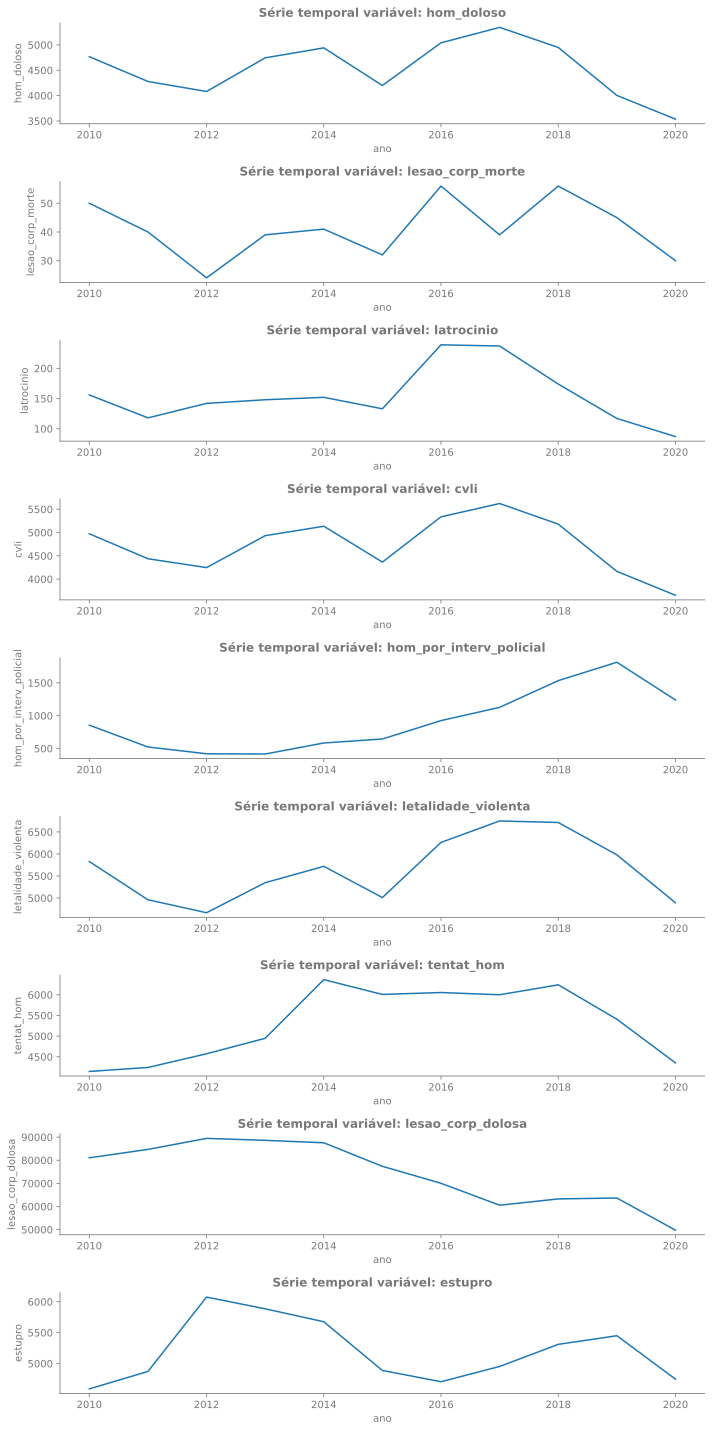

In [23]:
#Criando um contado para iterar com o axes
cont = 0

#Criando um dataframe para somar os casos por ano
df_sel = df_corte_2010.groupby('ano',as_index = False)[crimes_violentos].sum()

#Definindo os parâmetros de style para o matplotlib
rc_params = {'axes.edgecolor':'#787878', 
             'axes.titlecolor':'#787878', 
             'axes.labelcolor': '#787878', 
             'axes.spines.top':False, 
             'axes.spines.right': False, 
             'xtick.color': '#787878', 
             'ytick.color': '#787878',
             'axes.titleweight': 'bold',
             'axes.titlesize': 12}

#Aplicando os parâmetrod no seaborn
with plt.rc_context(rc_params):

  #Inicializando o objeto Figure e Axes
  fig, ax = plt.subplots(nrows = len(crimes_violentos), ncols = 1, figsize = (10,20))

  #Criado loop para reproduzir os gráficos para cada crime
  for crime in crimes_violentos:

    #Criando o gráfico de linha com seaborn
    sns.lineplot(x = 'ano', y= crime, data = df_sel, ax = ax[cont], ci = None)

    #Definindo o título
    ax[cont].set_title(label = "Série temporal variável: " + crime)

    #Iterando o contador conforme loop
    cont = cont + 1

  #Criando o layout para não deixar sobressair as descrições  
  plt.tight_layout()


A partir da plotagem do gráfico de linha é possível extrair informações como:
* A baixa histórica e as quedas para o ano de 2020 podem ter relação com a pandemia de COVID-19 em que houve a necessidade de adaptarmos aos novos tempos, reduzindo as circulações nas cidades com a finalidade de conter o vírus;
*  A variável **lesão corporal seguida com morte** no períodos entre 2015 a 2018 tem um comportamento descontrolado seguido de picos e vales. A partir de 2018, há uma tendência de baixa;
* As variáveis **homicídio doloso** e **latrocínio** apresentaram um aumento expressivo em 2016 e 2017. A partir 2018, há uma tendência de baixa, com destaque para **homicídio doloso** chegando uma baixa histórica em 2019;
* A variável **homicídio por intervenção policial** vem apresentando uma tendência de alta desde de 2013. Se fizermos um recorte do anos de 2018 e 2019, conseguimos avaliar um aumento mais expressivo que pode ter relação com a redução das variáveis **homicídio doloso**, **latrocínio** e **lesão corporal seguida com morte**;
* A variável **tentativa de homicídio** começa a decair a partir de 2019 e também pode ter relação com a variável **homicídio por intervenção policial**;
* A variável **lesão corporal dolosa** se encontra em baixa e controlada desde de 2017;
* A variável **estupro**, apesar de vir com uma tendência de baixa entre 2012 e 2016, voltou a crescer e precisa ser controlada, desconsiderando 2020 desta análise.

### Crimes de trânsito

Nesta seção vamos avaliar o comportamento dos dados e a evolução histórica para as variáveis classificadas como crimes de trânsito.

Primeiro, iremos avaliar o resumo estatísticos destas variáveis.

In [24]:
#Resumo estatístico das variáveis crimes de trânsito
df_corte_2010[crimes_transito].describe()

,hom_culposo,lesao_corp_culposa
count,132.000000,132.000000
mean,175.318182,3072.681818
std,28.087192,888.830515
min,111.000000,584.000000
25%,154.750000,2376.250000
50%,172.500000,3313.000000
75%,191.000000,3802.250000
max,250.000000,4313.000000


Vale destacar que ambas as variáveis contém casos envolvendo atropelamento, colisão e entre outros.

A partir da estatística descritiva é possível destacar:
* Cerca de 175 pessoas em média mensal morrem por crimes de trânsito, tendo já chegado um valor máximo de 250 pessoas e um valor mínimo de 111 pessoas por mês;
* Em relação a lesão corporal culposa, os valores são bem expressivos, tendo em média de 3073 pessoas feridas por crimes de trânsito em cada mês.

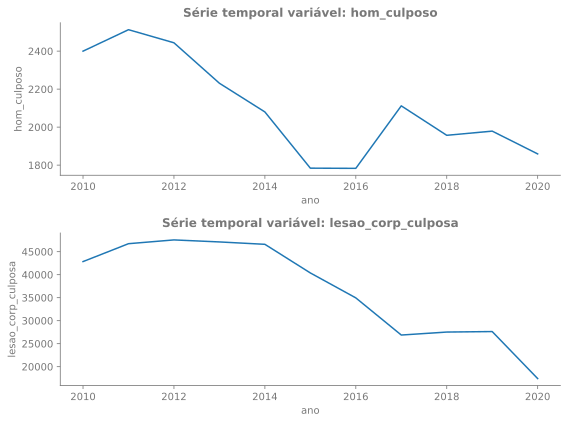

In [25]:
#Criando um contado para iterar com o axes
cont = 0

#Criando um dataframe para somar os casos por ano
df_sel = df_corte_2010.groupby('ano',as_index = False)[crimes_transito].sum()

#Definindo os parâmetros de style para o matplotlib
rc_params = {'axes.edgecolor':'#787878', 
             'axes.titlecolor':'#787878', 
             'axes.labelcolor': '#787878', 
             'axes.spines.top':False, 
             'axes.spines.right': False, 
             'xtick.color': '#787878', 
             'ytick.color': '#787878',
             'axes.titleweight': 'bold',
             'axes.titlesize': 12}

#Aplicando os parâmetrod no seaborn
with plt.rc_context(rc_params):

  #Inicializando o objeto Figure e Axes
  fig, ax = plt.subplots(nrows = len(crimes_transito), ncols = 1, figsize = (8,6))

  #Criado loop para reproduzir os gráficos para cada crime
  for crime in crimes_transito:

    #Criando o gráfico de linha com seaborn
    sns.lineplot(x = 'ano', y= crime, data = df_sel, ax = ax[cont], ci = None)

    #Definindo o título
    ax[cont].set_title(label = "Série temporal variável: " + crime)

    #Iterando o contador conforme loop
    cont = cont + 1

  #Criando o layout para não deixar sobressair as descrições  
  plt.tight_layout()

A partir dos gráficos é possível extrair as seguintes informações:
* A baixa histórica e as quedas para o ano de 2020 podem ter relação com a pandemia de COVID-19 em que houve a necessidade de adaptarmos aos novos tempos, reduzindo as circulações nas cidades com a finalidade de conter o vírus;
* Tanto as **mortes** quanto as **lesões corporais culposas** ocorridas por crimes de trânsito apresentaram um resultado expressivo entre 2010 e 2012. A partir de 2012, o **número de mortes** começou a reduzir, porém, os casos de **lesão corporal** continuaram. Além disso, após 2014 os resultados praticamente tiveram o mesmo sentido de tendência, com exceção de 2017 para o **homicídio culposo**.


### Crimes associados a Roubos



Vamos avaliar o resumo estatístico das variáveis associadas a crimes envolvendo roubos.

In [26]:
#Imprimir o resumo estatístico das variáveis describe.
df_corte_2010[crimes_roubos].describe()

,roubo_transeunte,roubo_celular,roubo_em_coletivo,roubo_rua,roubo_veiculo,roubo_carga,roubo_comercio,roubo_residencia,roubo_banco,roubo_cx_eletronico,roubo_conducao_saque,roubo_apos_saque,roubo_bicicleta,outros_roubos,total_roubos
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,84.000000,132.000000,132.000000
mean,5810.265152,1179.553030,833.696970,7823.515152,2772.068182,515.863636,489.333333,103.151515,1.909091,3.530303,7.613636,110.000000,11.916667,1475.613636,13310.181818
std,1541.008814,750.499145,373.264717,2461.672154,1038.709646,255.078817,129.920508,22.202910,1.405847,2.400507,3.742979,42.803831,7.789719,665.174059,4262.648698
min,2260.000000,301.000000,345.000000,3298.000000,1413.000000,170.000000,169.000000,38.000000,0.000000,0.000000,1.000000,11.000000,0.000000,782.000000,7315.000000
25%,4677.500000,503.000000,549.000000,5765.500000,1810.500000,290.000000,393.750000,91.750000,1.000000,2.000000,5.000000,71.750000,4.750000,950.250000,9704.000000
50%,5566.000000,915.500000,670.000000,7163.000000,2512.500000,474.000000,493.000000,105.000000,2.000000,3.000000,7.000000,110.000000,13.000000,1189.500000,12132.000000
75%,7020.500000,1988.250000,1175.000000,9924.750000,3403.750000,694.250000,599.000000,118.500000,3.000000,5.000000,10.000000,145.250000,17.000000,1802.750000,16902.750000
max,9669.000000,2626.000000,1628.000000,13833.000000,5358.000000,1329.000000,774.000000,148.000000,7.000000,12.000000,19.000000,198.000000,29.000000,3661.000000,23203.000000


Vale destacar que a variável **roubo_rua** corresponde ao somatório do **roubo_transeunte**, **roubo_celular** e **roubo_coletivo**. Além disso, o **outros_roubos** contém a contagem da variável latrocínio apresentado na seção de crimes violentos.

Os resultados associados a roubos são bem expressivos, com destaque maior para roubos em rua e de veículos, de acordo com a média.



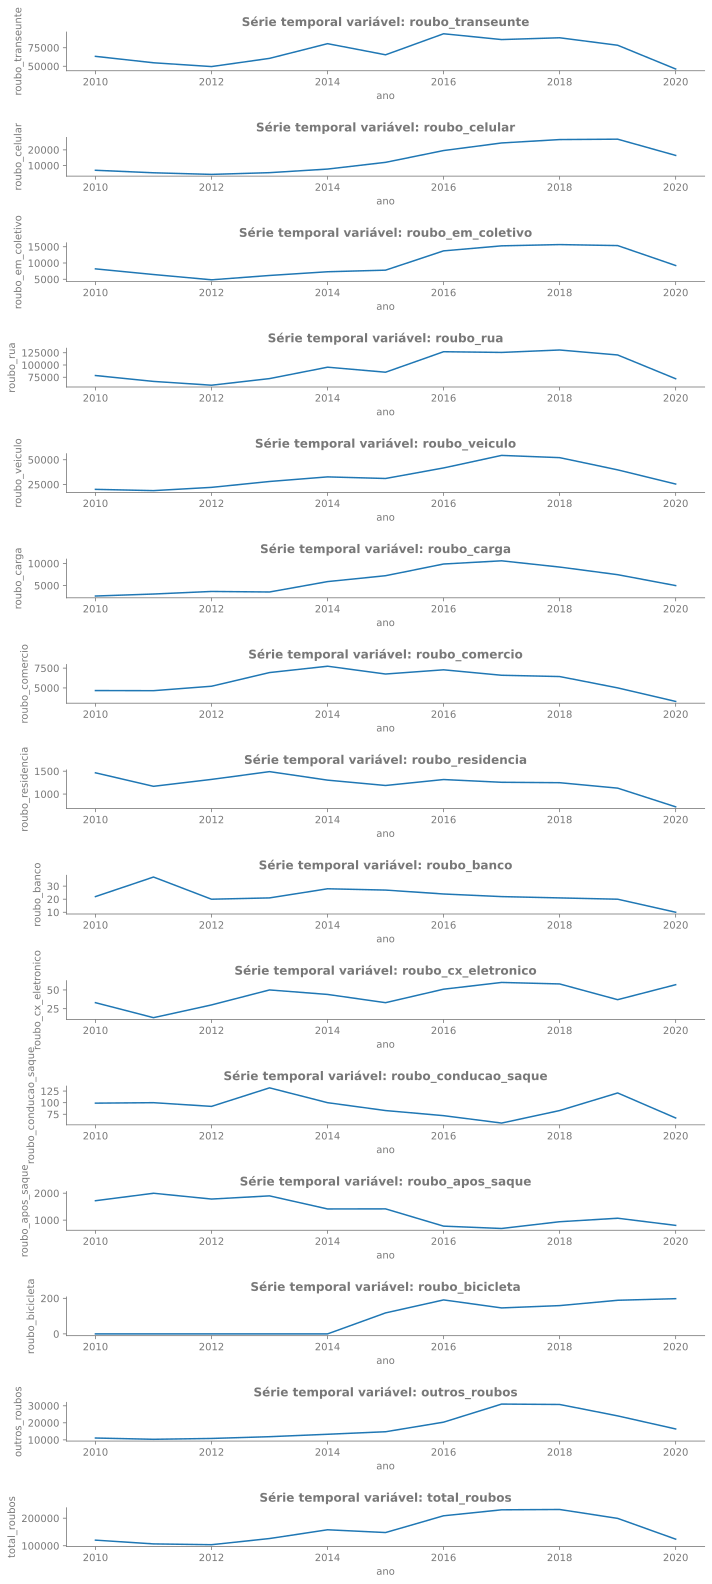

In [27]:
#Criando um contado para iterar com o axes
cont = 0

#Criando um dataframe para somar os casos por ano
df_sel = df_corte_2010.groupby('ano',as_index = False)[crimes_roubos].sum()

#Definindo os parâmetros de style para o matplotlib
rc_params = {'axes.edgecolor':'#787878', 
             'axes.titlecolor':'#787878', 
             'axes.labelcolor': '#787878', 
             'axes.spines.top':False, 
             'axes.spines.right': False, 
             'xtick.color': '#787878', 
             'ytick.color': '#787878',
             'axes.titleweight': 'bold',
             'axes.titlesize': 12}

#Aplicando os parâmetrod no seaborn
with plt.rc_context(rc_params):

  #Inicializando o objeto Figure e Axes
  fig, ax = plt.subplots(nrows = len(crimes_roubos), ncols = 1, figsize = (10,22))

  #Criado loop para reproduzir os gráficos para cada crime
  for crime in crimes_roubos:

    #Criando o gráfico de linha com seaborn
    sns.lineplot(x = 'ano', y= crime, data = df_sel, ax = ax[cont], ci = None)

    #Definindo o título
    ax[cont].set_title(label = "Série temporal variável: " + crime)

    #Iterando o contador conforme loop
    cont = cont + 1

  #Criando o layout para não deixar sobressair as descrições  
  plt.tight_layout()

A partir dos gráficos plotados é possível extrair as seguintes informações:
* A baixa histórica e as quedas para o ano de 2020 podem ter relação com a pandemia de COVID-19 em que houve a necessidade de adaptarmos aos novos tempos, reduzindo as circulações nas cidades com a finalidade de conter o vírus. Esta hipótese apenas não é válida para a variável **roubo em caixa eletrônico** que houve aumento dos números de casos, apesar da pandemia;
* O roubo de bicicleta é 0 para alguns anos, porque este crime passou a ser registrado a partir de 2014;
* O total de roubos houve aumento expressivo a partir de 2016 e começou a decair em 2018. Esta queda pode ter relação com a variável **homicídio por intervenção policial** (mudança de política segurança), como apresentado na seção de crimes violentos. 

Agora vamos avaliar a composição dos roubos para verificar quais tipos acontecem com maior frequência. Para esta análise, iremos utilizar os dados a partir de 2014, devido ao inicio dos registro dos casos envolvendo bicicletas.

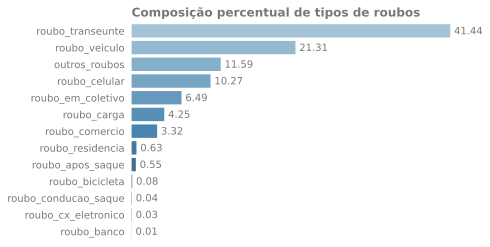

In [28]:
#Criando um corte a partir de 2014 quando começou a registrar os casos de bicicleta
df_corte_2014 = df_corte_2010.loc[ df_corte_2010['ano'] > 2013 ]

#Criando uma lista a partir do index de contagem de roubos
tipo_roubo = df_corte_2014[crimes_roubos].sum().sort_values(ascending = False).index.to_list()

#Criando uma lista a partir da contagem de roubo
qtd_roubo = (round((df_corte_2014[crimes_roubos].sum().sort_values(ascending = False) / df_corte_2014['total_roubos'].sum())*100,2)).to_list()

#Excluindo o total de roubos da lista
tipo_roubo.pop(0)
qtd_roubo.pop(0)

#Excluindo o roubo de rua da lista
tipo_roubo.pop(0)
qtd_roubo.pop(0)

#Definindo os parâmetros de style para o matplotlib
rc_params_bar = { 'axes.edgecolor':'#787878', 
                  'axes.titlecolor':'#787878', 
                  'ytick.color': '#787878',
                  'ytick.labelsize': 10,
                  'axes.spines.top':False, 
                  'axes.spines.right': False, 
                  'axes.spines.bottom': False, 
                  'axes.spines.left': False, 
                  'xtick.labelbottom': False,
                  'xtick.bottom': False,
                  'ytick.left': False,
                  'axes.titleweight': 'bold',
                  'axes.titlesize': 12,
                  'axes.titlelocation': 'left'}

#setando os parâmetros no matplotlib
with plt.rc_context(rc_params_bar):

  fig, ax = plt.subplots()

  #Fazendo o gráfico de barras com o Seaborn
  sns.barplot(x = qtd_roubo, 
              y = tipo_roubo, 
              palette="Blues_d")  
  
  #Definindo o título
  ax.set_title("Composição percentual de tipos de roubos")

  #Colocando os valores ao lado do gráfico de barra
  for i, v in enumerate(qtd_roubo):
    ax.text(v + 0.5, i + 0.2, str(v), color = '#787878', fontsize = 10)
  
  #Plotando o gráfico
  plt.show()

Como podemos observar a maior parte dos roubos são do tipo transeunte e seguido por veículos. Além disso, é possível constatar como a parcela "outros" é bem representativa dentro da amostra.

### Crimes associados a furtos

Vamos avaliar o resumo estatístico das variáveis associadas a furtos.

In [30]:
#Imprimindo o resumo esatatístico
df_corte_2010[crimes_furtos].describe()

,furto_veiculos,furto_transeunte,furto_coletivo,furto_celular,furto_bicicleta,outros_furtos,total_furtos
count,132.000000,132.000000,132.000000,132.000000,84.000000,132.000000,132.000000
mean,1361.015152,2335.045455,767.977273,1473.325758,133.083333,7601.696970,13623.750000
std,149.741762,899.673485,190.713224,343.224750,78.593848,1027.942003,2266.090679
min,904.000000,255.000000,105.000000,305.000000,0.000000,3089.000000,5722.000000
25%,1281.000000,1648.250000,701.000000,1321.000000,98.250000,7237.000000,12704.750000
50%,1363.500000,2399.000000,831.000000,1461.500000,157.500000,7710.500000,14051.000000
75%,1432.000000,2760.500000,894.500000,1715.000000,183.000000,8206.500000,14840.250000
max,1713.000000,5368.000000,1036.000000,2270.000000,278.000000,9880.000000,18003.000000


Como avaliamos nos crimes associados a roubos, a quantidade associados a casos envolvendo furtos é bem expressiva, sendo superior aos roubos quando comparado com a média e a mediana.

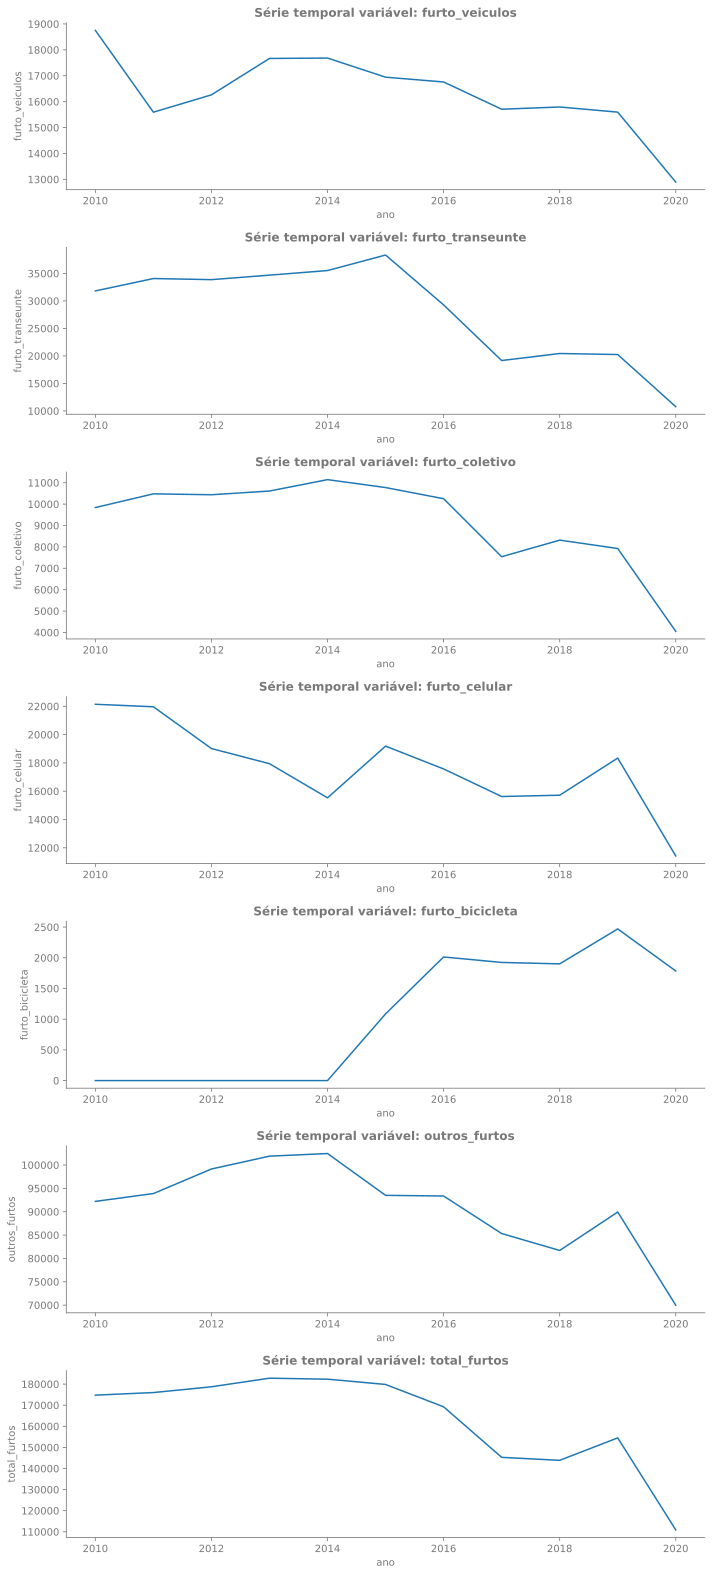

In [31]:
#Criando um contado para iterar com o axes
cont = 0

#Criando um dataframe para somar os casos por ano
df_sel = df_corte_2010.groupby('ano',as_index = False)[crimes_furtos].sum()

#Definindo os parâmetros de style para o matplotlib
rc_params = {'axes.edgecolor':'#787878', 
             'axes.titlecolor':'#787878', 
             'axes.labelcolor': '#787878', 
             'axes.spines.top':False, 
             'axes.spines.right': False, 
             'xtick.color': '#787878', 
             'ytick.color': '#787878',
             'axes.titleweight': 'bold',
             'axes.titlesize': 12}

#Aplicando os parâmetrod no seaborn
with plt.rc_context(rc_params):

  #Inicializando o objeto Figure e Axes
  fig, ax = plt.subplots(nrows = len(crimes_furtos), ncols = 1, figsize = (10,22))

  #Criado loop para reproduzir os gráficos para cada crime
  for crime in crimes_furtos:

    #Criando o gráfico de linha com seaborn
    sns.lineplot(x = 'ano', y= crime, data = df_sel, ax = ax[cont], ci = None)

    #Definindo o título
    ax[cont].set_title(label = "Série temporal variável: " + crime)

    #Iterando o contador conforme loop
    cont = cont + 1

  #Criando o layout para não deixar sobressair as descrições  
  plt.tight_layout()

Diante dos gráficos plotados é possível observar:
* A baixa histórica e as quedas para o ano de 2020 podem ter relação com a pandemia de COVID-19 em que houve a necessidade de adaptarmos aos novos tempos, reduzindo as circulações nas cidades com a finalidade de conter o vírus;
* O furto de bicicleta é 0 para alguns anos, porque este crime passou a ser registrado a partir de 2014;
* A maioria dos furtos vem reduzindo ao longo dos anos que pode estar associada a variável **homicídio por intervenção policial**, podendo ser um reflexo de uma mudança na política de segurança;
* Os casos envolvendo furtos de bicicleta vem aumentando ao longo dos anos.

Agora vamos avaliar a composição de furtos para verificar quais tipos acontecem com maior frequência. Para esta análise, iremos utilizar os dados a partir de 2014, devido ao inicio dos registro dos casos envolvendo bicicletas.

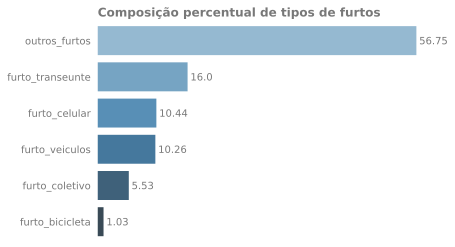

In [33]:
#Criando um corte a partir de 2014 quando começou a registrar os casos de bicicleta
df_corte_2014 = df_corte_2010.loc[ df_corte_2010['ano'] > 2013 ]

#Criando uma lista a partir do index de contagem de roubos
tipo_furto = df_corte_2014[crimes_furtos].sum().sort_values(ascending = False).index.to_list()

#Criando uma lista a partir da contagem de roubo
qtd_furto = (round((df_corte_2014[crimes_furtos].sum().sort_values(ascending = False) / df_corte_2014['total_furtos'].sum())*100,2)).to_list()

#Excluindo o total de roubos da lista
tipo_furto.pop(0)
qtd_furto.pop(0)

#Definindo os parâmetros de style para o matplotlib
rc_params_bar = { 'axes.edgecolor':'#787878', 
                  'axes.titlecolor':'#787878', 
                  'ytick.color': '#787878',
                  'ytick.labelsize': 10,
                  'axes.spines.top':False, 
                  'axes.spines.right': False, 
                  'axes.spines.bottom': False, 
                  'axes.spines.left': False, 
                  'xtick.labelbottom': False,
                  'xtick.bottom': False,
                  'ytick.left': False,
                  'axes.titleweight': 'bold',
                  'axes.titlesize': 12,
                  'axes.titlelocation': 'left'}

#setando os parâmetros no matplotlib
with plt.rc_context(rc_params_bar):

  fig, ax = plt.subplots()

  #Fazendo o gráfico de barras com o Seaborn
  sns.barplot(x = qtd_furto, 
              y = tipo_furto, 
              palette="Blues_d")  
  
  #Definindo o título
  ax.set_title("Composição percentual de tipos de furtos")

  #Colocando os valores ao lado do gráfico de barra
  for i, v in enumerate(qtd_furto):
    ax.text(v + 0.5, i + 0.1, str(v), color = '#787878', fontsize = 10)
  
  #Plotando o gráfico
  plt.show()

Como podemos observar, a parcela "outros" é a mais representativa dentro dos casos envolvendo furtos, seguido por furtos transeuntes e de celular.

### Atividade policial

Além de mostrar as análises de dados associados aos crimes do Rio de Janeiro, também devemos olhar a atuação policial que combate diariamente estes crimes.

Primeiramente, iremos plotar a atuação da polícia em relação a recuperação de veículos roubados e furtados.

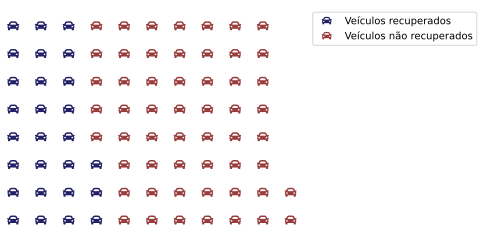


 Cerca de 49.0 % veículos são recuperados.


In [ ]:
#Variável para armazenar a quantidade de veículos roubados e furtados
qtd_furtos_roubos_veiculo = df_corte_2010['roubo_veiculo'].sum() + df_corte_2010['furto_veiculos'].sum()

#Variável para armazenar o % de veículos recuperados
qtd_veiculos_recuperados = (df_corte_2010['recuperacao_veiculos'].sum())/10000

#Variável parar armazenar o % de veículos não recuperados
qtd_veiculos_nao_recuperados = (qtd_furtos_roubos_veiculo - qtd_veiculos_recuperados)/10000

# plotar o número de veículos recuperados x não recuperados
fig = plt.figure(
    FigureClass=Waffle, 
    rows=8, 
    values={'Veículos recuperados': qtd_veiculos_recuperados, 'Veículos não recuperados': qtd_veiculos_nao_recuperados }, 
    colors=("#232066", "#983D3D"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='car', icon_size=12, 
    icon_legend=True
)

fig.set_tight_layout(False)
plt.show();

print("\n Cerca de", round(((qtd_veiculos_recuperados*10000)/qtd_furtos_roubos_veiculo)*100,0), "% veículos são recuperados.")

Portanto, cerca de 49% de veículos furtados e roubados são recuperados pela polícia no estado do Rio de Janeiro.

Como sabemos, a violência do Rio de Janeiro traz danos tanto para a sociedade quanto para aqueles que tentam combatê-la. Portanto, iremos plotar os dados relacionados com morte de policiais militares e civis em serviço.

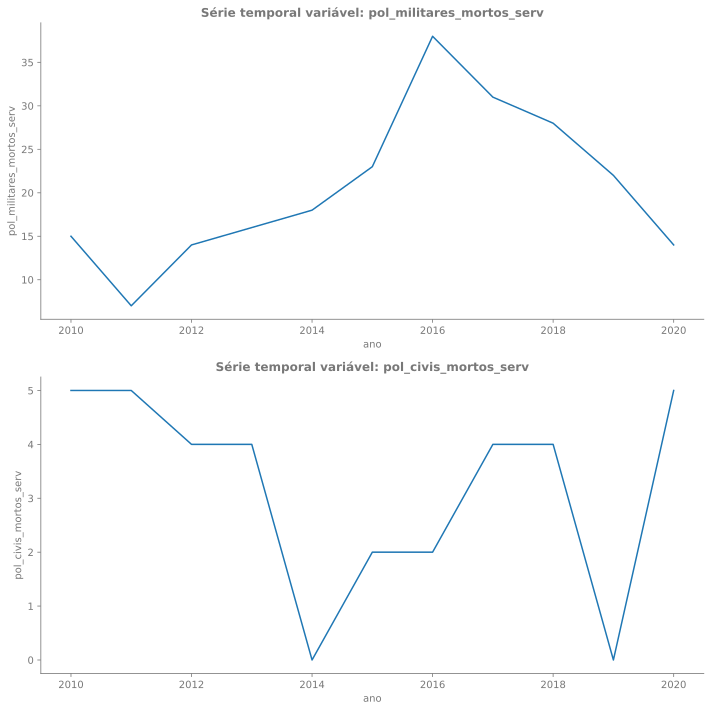

In [ ]:
#Criando um contado para iterar com o axes
cont = 0

lista_var_policia = ['pol_militares_mortos_serv', 'pol_civis_mortos_serv']

#Criando um dataframe para somar os casos por ano
df_sel = df_corte_2010.groupby('ano',as_index = False)[lista_var_policia].sum()

#Definindo os parâmetros de style para o matplotlib
rc_params = {'axes.edgecolor':'#787878', 
             'axes.titlecolor':'#787878', 
             'axes.labelcolor': '#787878', 
             'axes.spines.top':False, 
             'axes.spines.right': False, 
             'xtick.color': '#787878', 
             'ytick.color': '#787878',
             'axes.titleweight': 'bold',
             'axes.titlesize': 12}

#Aplicando os parâmetrod no seaborn
with plt.rc_context(rc_params):

  #Inicializando o objeto Figure e Axes
  fig, ax = plt.subplots(nrows = len(lista_var_policia), ncols = 1, figsize = (10,10))

  #Criado loop para reproduzir os gráficos para cada crime
  for crime in lista_var_policia:

    #Criando o gráfico de linha com seaborn
    sns.lineplot(x = 'ano', y= crime, data = df_sel, ax = ax[cont], ci = None)

    #Definindo o título
    ax[cont].set_title(label = "Série temporal variável: " + crime)

    #Iterando o contador conforme loop
    cont = cont + 1

  #Criando o layout para não deixar sobressair as descrições  
  plt.tight_layout()

A partir das plotagens podemos observar que:

* A variável **policiais civis mortos em serviços** apresenta um comportamento de dados descontrolado. Mas, o que nos chama a atenção é o aumento expressivo em 2020 por causa da pandemia do COVID-19;
* A variável **policiais militares mortos em serviços** apresentou um aumento entre o período de 2012 a 2016, com maior pico no último ano. Isto pode estar associada a variável de **crimes violentos letais intencionais**. Enquanto a queda pode estar relacionada com a redução desta mesma variável mais o aumento do **homicídio por intervenção policial**, que pode significar em mudanças na política de segurança. Além destas questões, a queda em 2020 pode estar associada a pandemia do COVID-19, como retratado nas variáveis anteriores.

## Conclusão



Os dados extraídos do ISP tiveram que ser tratados em função de algumas variáveis virem do tipo texto, necessitando de sua conversão para valores numéricos. É importante ressaltar que o dicionário disponibilizado pelo orgão mencionado é bem detalhado e nos ajuda a entender sobre os dados ausentes.

Para este estudo, definimos como *dataset* os últimos 10 anos de dados (2010 a 2020), devido a busca por uma maior confiabilidade tanto na evolução dos registros quanto na forma de preenchimento.

Em relação a análise de dados, conseguimos extrair algumas informações importantes como:

* É demonstrado pelos gráficos que a maioria dos crimes estão caindo e pode estar associada com o aumento da variável **homicídio por intervenção policial**, podendo ser um reflexo de uma nova política de segurança pública. Além disso, a tendência de baixa nas **mortes de policiais militares** pode esta associada a redução da variáveis de crimes somados ao aumento de **homicídio por intervenção militar**;
* A baixa histórica e as quedas para o ano de 2020 podem ter relação com a pandemia de COVID-19 em que houve a necessidade de adaptarmos aos novos tempos, reduzindo as circulações nas cidades com a finalidade de conter o vírus. Esta hipótese apenas não é válida para os casos envolvendo **roubos de caixa eletrônico** que houve um aumento em 2020;
* Um fato que chamou atenção é o aumento expressivo de **mortes de policiais civis** em 2020 (ano de inicio da pandemia no Brasil);
* A parcela "outros" é bem representativa tanto no crimes de roubos quanto em furtos. Além disso, as variáveis do tipo roubo **transeunte** e **de veículos** são mais representativas. Enquanto, **transeunte** e **celular** são mais significativos nos casos envolvendo furtos;
* 49% dos veículos roubados e furtados são recuperados pela polícia;
* 394 pessoas em média são vítimas de **crimes violentos letais intencionais** por mês, com maior impacto sendo causado por **homicídios dolosos**.

